In [ ]:
# import data and libraries
# missing values
# split
# scaling
# model traing and fitting
# predicttion
# plot graph

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sample_data/letter-recognition.data")
df

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19995,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19996,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19997,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
df.isnull().sum()

,0
T,0
2,0
8,0
3,0
5,0
1,0
8.1,0
13,0
0,0
6,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x = df.drop("T" , axis = 1)
y = df["T"]
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 42)



In [ ]:
scaler_x = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier( hidden_layer_sizes = (250, 300) , activation = "logistic" , max_iter = 10000)
mlpc.fit( x_train_scaled , y_train )

MLPClassifier(activation='logistic', hidden_layer_sizes=(250, 300),
              max_iter=10000)

In [ ]:
y_pred = mlpc.predict( x_test_scaled )

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print( confusion_matrix( y_test , y_pred))
print(accuracy_score( y_test , y_pred ))



[[177   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  0 181   0   1   2   0   0   1   0   0   0   0   1   0   0   0   0   1
    0   0   0   1   0   1   0   0]
 [  0   0 160   0   2   0   2   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   1   0]
 [  0   1   0 187   0   0   0   1   0   0   0   0   1   0   2   0   0   2
    0   0   0   0   0   0   0   1]
 [  0   1   1   0 189   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   1 195   0   0   0   0   0   0   0   1   0   3   0   0
    0   2   0   1   0   0   0   0]
 [  0   0   1   1   3   0 196   0   0   0   1   1   0   0   1   0   0   1
    0   0   0   3   0   0   0   0]
 [  0   3   0   3   0   1   0 168   0   0   3   0   1   1   0   1   0   3
    0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 174   4   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  1   0   0   0  

Text(95.72222222222221, 0.5, 'predicted classes')

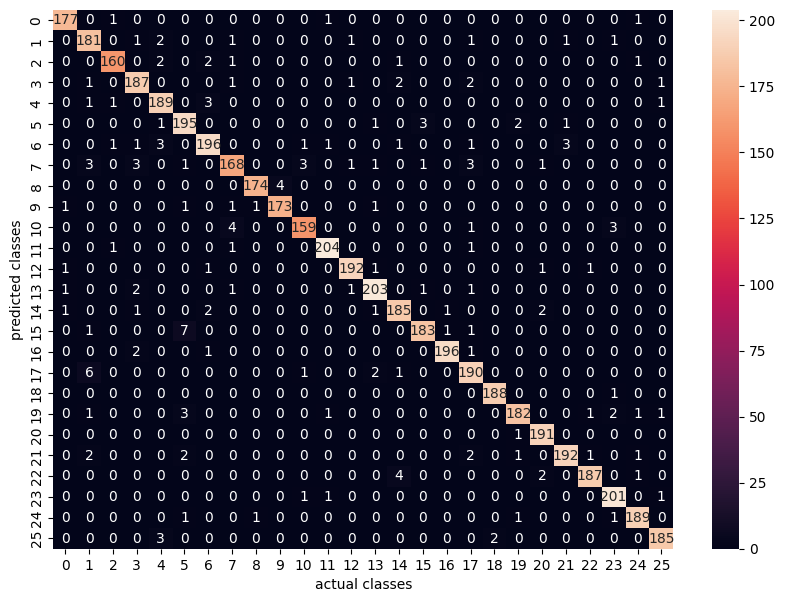

In [ ]:
# sns.heatmap( confusion_matrix( y_test , y_pred))
plt.figure(figsize=(10,7))
cm = confusion_matrix( y_test , y_pred)
sns.heatmap(cm, annot=True , fmt='d')
plt.xlabel("actual classes")
plt.ylabel("predicted classes")